In [1]:
%reload_ext autoreload
%autoreload 2
%pylab inline
plt.rcParams['figure.dpi'] = 150
import seaborn as sns
sns.set_color_codes()
sns.set_context('paper',font_scale=1.0)
sns.set_style('ticks')

import keprat.io
import os
PAPERDIR = '/Users/petigura/Research/Kepler-Radius-Ratio/paper/'

from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
letter_bbox_props = dict(
    boxstyle="round,pad=0.,rounding_size=0.2",fc='w',alpha=0.7,
    ec='none'
)
letter_text_props = dict(size='large', weight='bold')

def letter_plot(letter):
    ax = gca()
    at = AnchoredText(letter,loc=2, frameon=True, prop=letter_text_props)
    ax.add_artist(at)
    setp(at.patch,**letter_bbox_props)        

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Run again
plt.rcParams['figure.dpi'] = 150

keprat/io.py:316: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(fn,sep='\t+',names=columns,skiprows=1,index_col=None)
/Users/petigura/anaconda2/lib/python2.7/site-packages/matplotlib/offsetbox.py:1243: UserWarning: Mixing horizontalalignment or verticalalignment with AnchoredText is not supported.
  warnings.warn("Mixing horizontalalignment or verticalalignment "
/Users/petigura/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:45: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf


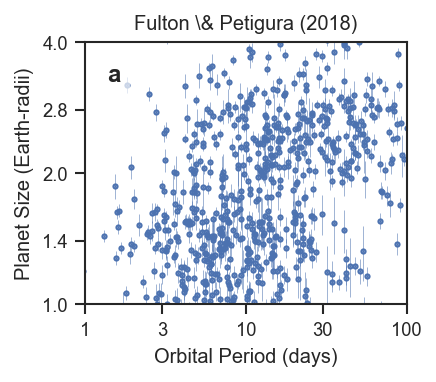

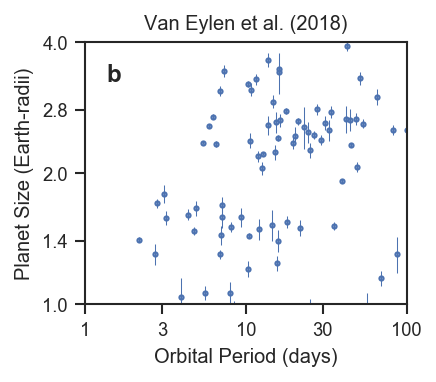

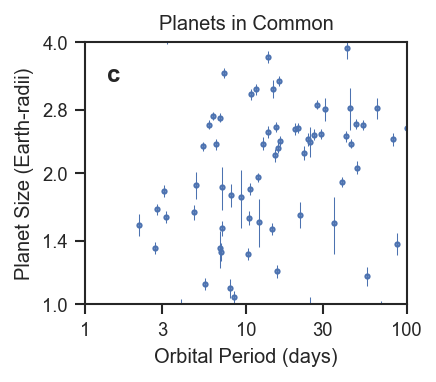

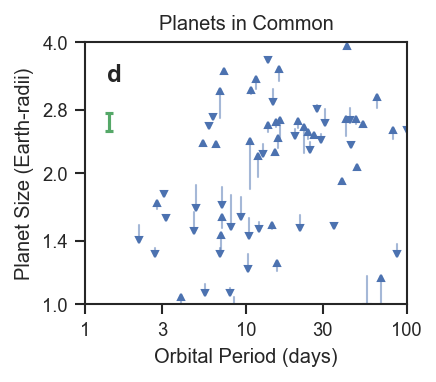

In [3]:
import seaborn as sns
sns.set_context('paper',font_scale=1.0)

def _format():
    fig = gcf()
    xlim(1,100)
    ylim(1,4)
    xt = [1,3,10,30,100]
    yt = [1.0,1.4,2.0,2.8,4.0]
    xticks(xt,xt)
    yticks(yt,yt)
    minorticks_off()
    xlabel('Orbital Period (days)')
    ylabel('Planet Size (Earth-radii)')
    fig.set_size_inches((3,2.5))
    tight_layout()

df = keprat.io.load_table('f18')
fig = figure()
loglog()
#yerr = np.vstack([df['E_Rp'],df['e_Rp']])
errorbar(df.f18_period,df.f18_prad,yerr=df.f18_prad_err,lw=0.25,mew=2,ms=2,fmt='.',color='b')
_format()
letter_plot('a')
title('Fulton \& Petigura (2018)')
fn = os.path.join(PAPERDIR,'fig_f18.pdf')
fig.savefig(fn)
f18 = df.copy()

df = keprat.io.load_table('v18')
yerr = np.vstack([-df.v18_prad_err2,df.v18_prad_err1])
fig = figure()
loglog()
#yerr = np.vstack([df['E_Rp'],df['e_Rp']])
errorbar(df.v18_period,df.v18_prad,yerr=yerr,lw=0.5,mew=2,ms=2,fmt='.',color='b')
_format()
letter_plot('b')
title('Van Eylen et al. (2018)')
fn = os.path.join(PAPERDIR,'fig_v18.pdf')
fig.savefig(fn)
v18 = df.copy()


f18.index = f18.id_koicand
df = f18.loc[v18.id_koicand]
fig = figure()
loglog()
errorbar(df.f18_period,df.f18_prad,yerr=df.f18_prad_err,lw=0.5,mew=2,ms=2,fmt='.',color='b')
_format()
letter_plot('c')
title('Planets in Common')
fn = os.path.join(PAPERDIR,'fig_f18-v18-subset.pdf')
fig.savefig(fn)


df = keprat.io.load_table('all')
df = df.dropna(subset=['f18_prad','v18_prad'])

fig = figure()
loglog()
for i,row in df.iterrows():
    plot([row.f18_period,row.f18_period],[row.v18_prad,row.f18_prad],color='b',lw=1,alpha=0.5)
    if row.v18_prad > row.f18_prad:
        plot([row.f18_period],[row.v18_prad],marker='^',ms=3,color='b')
    else:
        plot([row.f18_period],[row.v18_prad],marker='v',ms=3,color='b')

    
_format()
plot([1.4,1.4],[2.5,2.5*1.1],'g-',mew=1.5,lw=1.5,marker='_',ms=4)

letter_plot('d')
title('Planets in Common')
fig.savefig('paper/fig_f18-arrows.pdf')

## Difference between V18 and F18

In [4]:
def fig_compare_ratio(x,y,textkw=dict(size='small',va='top',color='b',ha='right'),plotkw={},fig=None,tx=0.95,ty=0.95,):
    if fig==None:
        fig = figure(figsize=(2.5,3))
        
    plot(x,y,'.',**plotkw)
    RMS = y.std()
    N = y.count()

    s = """\
$N$ = {}
$\sigma$ = {:.1f}%""".format(N,RMS*100)

    text(tx,ty, s, transform=gca().transAxes,**textkw )
    ylim(0.8,1.2)
    tight_layout()

read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf
N False Positives, = 4, False Positive Rate = 0.0454545454545


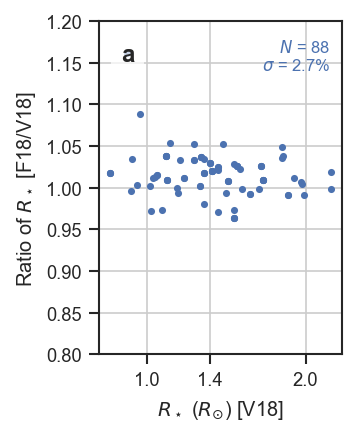

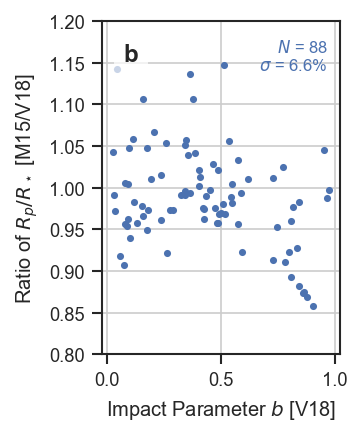

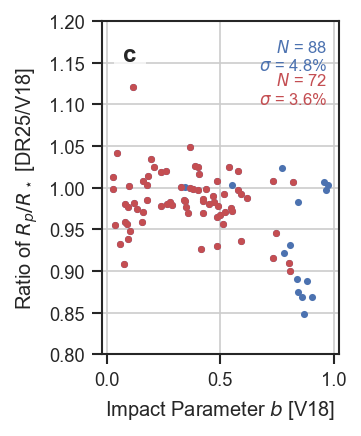

In [5]:
# plot 1
df = keprat.io.load_table('all')
df = df.dropna(subset=['f18_prad','v18_prad'])
x = df.v18_srad
y = df.f18_srad / df.v18_srad
fig_compare_ratio(x,y,plotkw=dict(color='b'))
ylabel('Ratio of $R_\star$ [F18/V18]')
xlabel('$R_\star$ ($R_{\odot}$) [V18]')
tight_layout()
grid()
xt = [1.0,1.4,2.0]
xticks(xt,xt)
letter_plot('a')
savefig('paper/fig_compare-srad-f18-v18.pdf')

# plot 2
df = keprat.io.load_table('all')
df = df.dropna(subset=['f18_prad','v18_prad'])
x = df.v18_impact
y = df.m15_ror / df.v18_ror
fig_compare_ratio(x,y,plotkw=dict(color='b'))
ylabel('Ratio of $R_p / R_\star$ [M15/V18]')
xlabel('Impact Parameter $b$ [V18]')
tight_layout()
grid()
letter_plot('b')
savefig('paper/fig_compare-ror-m15-v18.pdf')

# plot 3
df = keprat.io.load_table('cksgaia-planets')
df = df.dropna(subset=['f18_prad','v18_prad'])
x = df.v18_impact
y = df.dr25_RD1_cum / df.v18_ror
fig_compare_ratio(x,y,plotkw=dict(color='b'))
ylabel('Ratio of $R_p / R_\star$ [DR25/V18]')
xlabel('Impact Parameter $b$ [V18]')
tight_layout()
fig = gcf()
df = keprat.io.load_table('cksgaia-planets')
df = df.dropna(subset=['f18_prad','v18_prad']).query('dr25_tau / f18_tau0 > 0.6')
x = df.v18_impact
y = df.dr25_RD1_cum / df.v18_ror
grid()
fig_compare_ratio(x,y,fig=fig,plotkw=dict(color='r'),tx=0.95,ty=0.85,textkw=dict(color='r',size='small',va='top',ha='right'))
letter_plot('c')
savefig('paper/fig_compare-ror-dr25-v18.pdf')

df = keprat.io.load_table('cksgaia-planets')
df = df.dropna(subset=['f18_prad','v18_prad'])
nfp = len(df.query('v18_impact < 0.8 and dr25_tau / f18_tau0 < 0.6'))
ntot = len(df)
print "N False Positives, = {}, False Positive Rate = {}".format(nfp,1.0*nfp/ntot)

In [6]:
df.id_koicand.drop_duplicates()

id_koi
1       K00001.01
2       K00002.01
7       K00007.01
41      K00041.01
41      K00041.02
41      K00041.03
69      K00069.01
72      K00072.01
72      K00072.02
85      K00085.01
85      K00085.02
85      K00085.03
92      K00092.01
97      K00097.01
107     K00107.01
108     K00108.02
108     K00108.01
117     K00117.01
117     K00117.02
117     K00117.03
117     K00117.04
118     K00118.01
122     K00122.01
123     K00123.02
123     K00123.01
168     K00168.02
168     K00168.03
168     K00168.01
244     K00244.01
244     K00244.02
          ...    
367     K00367.01
370     K00370.01
370     K00370.02
374     K00374.01
623     K00623.01
623     K00623.02
623     K00623.03
623     K00623.04
974     K00974.01
975     K00975.01
1282    K01282.01
1442    K01442.01
1612    K01612.01
1618    K01618.01
1621    K01621.01
1883    K01883.01
1925    K01925.01
1930    K01930.01
1930    K01930.03
1930    K01930.04
1930    K01930.02
1964    K01964.01
2462    K02462.01
2545    K02545.01
263

read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf


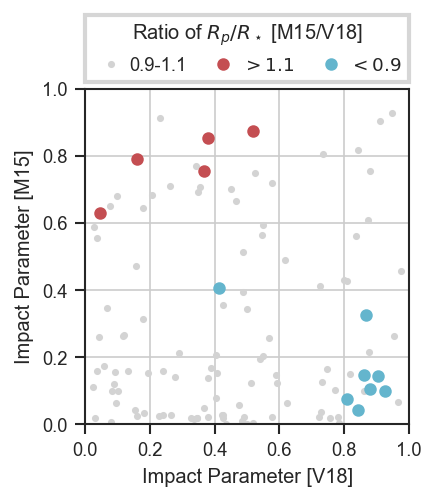

In [7]:
fig  = figure(figsize=(3,3.5))
df = keprat.io.load_table('all')
#df = df.dropna(subset=['f18_prad','v18_prad'])

plot(df.v18_impact,df.m15_impact,'.',color='LightGray',label='0.9-1.1')
cut = df.query('f18_ror / v18_ror  > 1.1')
plot(cut.v18_impact,cut.m15_impact,'r.',ms=10, label=r'$>1.1$')
cut = df.query('f18_ror / v18_ror < 0.90')
plot(cut.v18_impact,cut.m15_impact,'c.',ms=10, label=r'$<0.9$')
xlabel('Impact Parameter [V18]')
ylabel('Impact Parameter [M15]')
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.,handletextpad=0,
           title=r'Ratio of $R_p/R_\star$ [M15/V18]',
           fancybox=False,frameon=True)
leg.get_frame().set_linewidth(2)

xlim(0,1.0)
ylim(0,1.0)
grid()
tight_layout()
fig.subplots_adjust(top=0.8)

fig.savefig('paper/fig_impact-v18-m15.pdf')

read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf


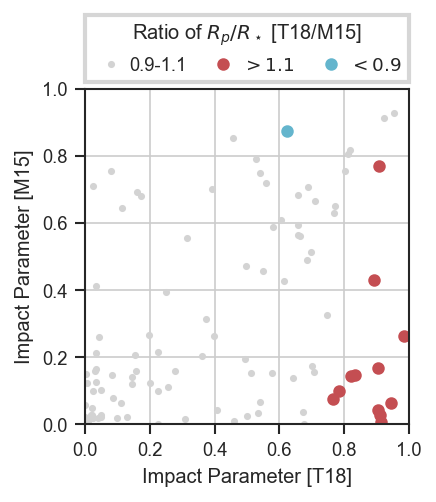

In [8]:
fig  = figure(figsize=(3,3.5))
df = keprat.io.load_table('all')
df = df.dropna(subset=['m15_prad','v18_prad'])

plot(df.t18_impact,df.m15_impact,'.',label='0.9-1.1',color='LightGray')
#xerr = vstack([-df.v18_impact_err2,df.v18_impact_err1])
#yerr = vstack([-df.m15_impact_err2,df.m15_impact_err1])
#errorbar(df.v18_impact,df.m15_impact,xerr=xerr,fmt='.',label='0.9-1.1')

cut = df.query('t18_ror / m15_ror  > 1.1')
plot(cut.t18_impact,cut.m15_impact,'r.',ms=10,label=r'$> 1.1$')
cut = df.query('t18_ror / m15_ror  < 0.90')
plot(cut.t18_impact,cut.m15_impact,'c.',ms=10,label=r'$< 0.9$')
xlabel('Impact Parameter [T18]')
ylabel('Impact Parameter [M15]')
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.,handletextpad=0,
           title=r'Ratio of $R_p/R_\star$ [T18/M15]',
           fancybox=False,frameon=True)

leg.get_frame().set_linewidth(2)

#legend(framealpha=1,loc='upper right',title=r'Ratio of $R_p/R_\star$')
xlim(0,1.0)
ylim(0,1.0)
grid()
tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('paper/fig_impact-t18-m15.pdf')

In [9]:
import chainconsumer
import matplotlib.ticker as ticker

def plot_corner(id_koicand):
    fmt = {}
    df = keprat.io.load_table('all')
    df.index = df.id_koicand
    table = "chains-dr25-{}".format(id_koicand)
    chain = keprat.io.load_table(table)
    data = array(chain['BB1 RD1'.split()])
    c = chainconsumer.ChainConsumer()  
    c.add_chain(data,parameters=['Impact Parameter $b$','$R_p/R_\star$ (\%)'])
    c.configure(cloud=False,summary=False,diagonal_tick_labels=False)
    c.plotter.plot()
    fig = gcf()
    axL = fig.get_axes()
    ax = axL[2]

    sca(ax)
    scale_y = 1e-2
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:.2f}'.format(x/scale_y))
    ax.yaxis.set_major_formatter(ticks_y)

    row = df.loc[id_koicand]
    x,y = row.m15_impact,row.m15_ror
#    plot(x,y,'.r',ms=10)
    x,y = row.m15_impact,row.m15_ror
    xerr = [[-row.m15_impact_err2],[row.m15_impact_err1]]
    yerr = [[-row.m15_ror_err2],[row.m15_ror_err1]]
    errorbar(x,y,xerr=xerr,yerr=yerr,fmt='.',ms=10,color='r')

    text(x,y,'M15 ',ha='right')
    x,y = row.v18_impact,row.v18_ror
    xerr = [[-row.v18_impact_err2],[row.v18_impact_err1]]
    yerr = [[-row.v18_ror_err2],[row.v18_ror_err1]]
    errorbar(x,y,xerr=xerr,yerr=yerr,fmt='.',ms=10,color='r')
    print x,y,xerr,yerr

    plot(x,y,'.r',ms=10)
    text(x,y,'V18 ',ha='right')

    x,y = row.t18_impact,row.t18_ror
    xerr = [[-row.t18_impact_err2],[row.t18_impact_err1]]
    yerr = [[-row.t18_ror_err2],[row.t18_ror_err1]]
    
    plot(x,y,'.r',ms=10)
    errorbar(x,y,xerr=xerr,yerr=yerr,fmt='.',ms=10)
    
    text(x,y,'T18 ',ha='right')
    fig.set_size_inches((4.5,4.5))  # Resize fig for doco. You don't need this.
    fig.subplots_adjust(left=0.2,bottom=0.2)


read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
0.516805910408 0.00985063953951 [[0.064970215395593778], [0.28715311990297709]] [[0.00024322263289877112], [0.00036338120843861649]]
read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
0.925356678283 0.0198155015399 [[0.010759805356746366], [0.017083521443986394]] [[0.00056533628409393202], [0.00067432843200919412]]


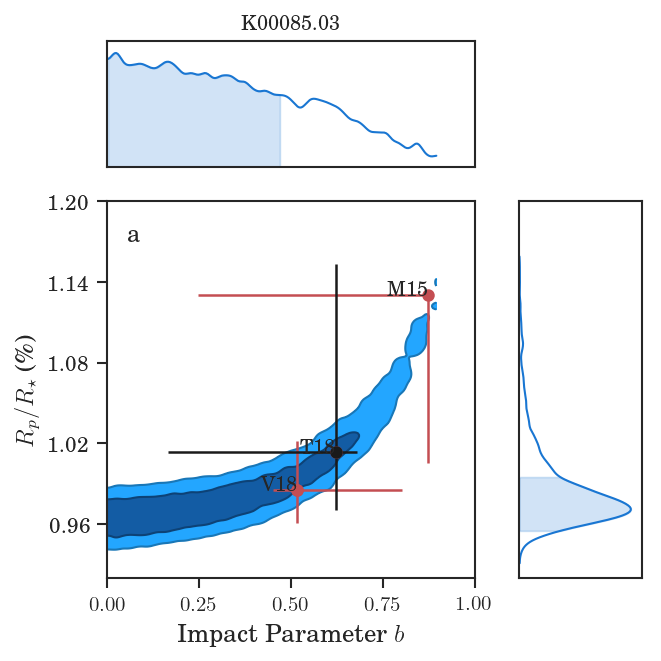

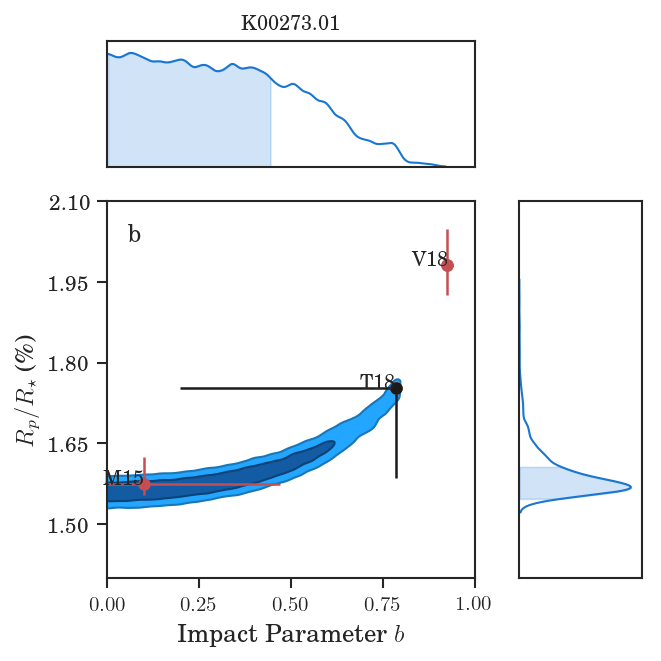

In [10]:
# This is an example where V18 said there was a high impact parameter, but F15 said no
,close all

id_koicand = 'K00085.03'
plot_corner(id_koicand)
fig = gcf()
axL = fig.get_axes()
setp([axL[0],axL[2]], xlim=(-0.001,1))
setp([axL[2],axL[3]], ylim=(0.0092,0.012))
setp(axL[0],title=id_koicand)
letter_plot('a')
tight_layout()
gcf().savefig('paper/fig_m15-high-v18-low.pdf')

    
id_koicand = 'K00273.01'
plot_corner(id_koicand)
fig = gcf()
axL = fig.get_axes()
setp([axL[0],axL[2]], xlim=(-0.001,1))
setp([axL[2],axL[3]], ylim=(0.014,0.021))

setp(axL[0],title=id_koicand)
ax = gca()
#text(0.1,0.9,id_koicand,transform=ax.transAxes)
letter_plot('b')
tight_layout()
gcf().savefig('paper/fig_m15-low-v18-high.pdf')


In [11]:
def _title(stit,ssub):
    ax = gca()
    text(0.5,1.09,stit,transform=ax.transAxes,ha='center',fontsize='large',fontweight='extra bold')
    text(0.5,1.03,ssub,transform=ax.transAxes,ha='center',fontsize='medium')


read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf


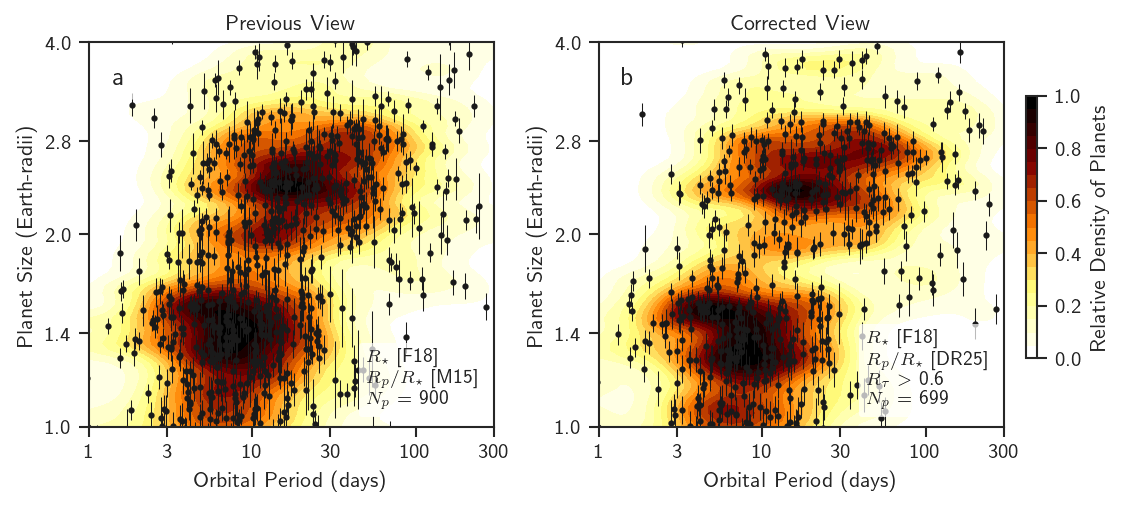

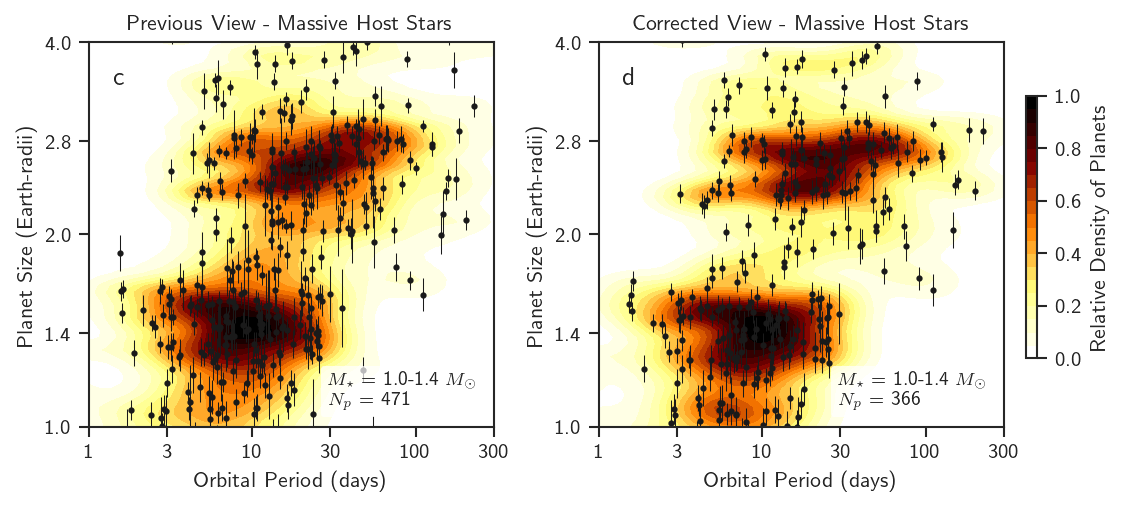

In [12]:
import seaborn as sns
from keprat.plot import ContourPlotter
sns.set_context('paper',font_scale=1.1)
sns.set_style('ticks')

df = keprat.io.load_table('cksgaia-planets')
fig, axL = subplots(ncols=2,nrows=1,figsize=(7.5,3.5))
df['x'] = df['f18_period']
df['dr25_prad'] = df.eval('dr25_RD1_cum * f18_srad * 109')
df['dr25_prad_err'] = df.eval('dr25_prad * sqrt( (0.5*(dr25_RD1_cum_err1 - dr25_RD1_cum_err2)/dr25_RD1_cum)**2 + (f18_srad_err/f18_srad)**2)')

df = df.dropna(subset=['x','dr25_prad','dr25_prad_err'])
samp1 = df
samp2 = df.query('dr25_tau/f18_tau0 > 0.6')

sca(axL[0])
p2 = ContourPlotter(samp1.x,samp1.f18_prad,samp1.f18_prad_err)
p2.compute_density()
p2.plot_contour(contourfkw=dict(add_colorbar=False))
p2.plot_points()

s = """\
$R_\star$ [F18]
$R_p/R_\star$ [M15]
$N_p$ = {}""".format(p2.n)
keprat.plot.add_anchored(s,4,prop=dict(size='small'))
letter_plot('a')
s = """Previous View"""
title(s)

sca(axL[1])
p1 = ContourPlotter(samp2.x,samp2.dr25_prad,samp2.dr25_prad_err)
p1.compute_density()
p1.plot_contour(contourfkw=dict(add_colorbar=False))
p1.plot_points()
letter_plot('b')

s = r"""\
$R_\star$ [F18]
$R_p/R_\star$ [DR25]
$R_\tau$ $>$ 0.6
$N_p$ = {}""".format(p1.n)
keprat.plot.add_anchored(s,4,prop=dict(size='small'))
s = """Corrected View"""
title(s)


tight_layout()
fig.subplots_adjust(right=0.9)
ticks = arange(0,1.001,0.2)
ax = fig.add_axes([0.92
                   ,0.3,0.01,0.5])
cb = gcf().colorbar(p2.im,ticks=ticks,cax=ax)
cb.set_label('Relative Density of Planets')
cb.ax.set_yticklabels("{:.1f}".format(f) for f in ticks)

gcf().savefig('paper/fig_compare-per-prad-smass=all.pdf')


df = keprat.io.load_table('cksgaia-planets')
#df = df.query('1.0 < f18_srad < 2.0')
df = df.query('1.0 < f18_smass < 1.4')
fig, axL = subplots(ncols=2,nrows=1,figsize=(7.5,3.5))
df['x'] = df['f18_period']
df['dr25_prad'] = df.eval('dr25_RD1_cum * f18_srad * 109')
df['dr25_prad_err'] = df.eval('dr25_prad * sqrt( (0.5*(dr25_RD1_cum_err1 - dr25_RD1_cum_err2)/dr25_RD1_cum)**2 + (f18_srad_err/f18_srad)**2)')

df = df.dropna(subset=['x','dr25_prad','dr25_prad_err'])
samp1 = df
samp2 = df.query('dr25_tau/f18_tau0 > 0.6')

sca(axL[0])
p2 = ContourPlotter(samp1.x,samp1.f18_prad,samp1.f18_prad_err)
p2.compute_density()
p2.plot_contour(contourfkw=dict(add_colorbar=False))
p2.plot_points()
s = r"""\
$M_\star$ = 1.0-1.4 $M_\odot$
$N_p$ = {}""".format(p2.n)
keprat.plot.add_anchored(s,4,prop=dict(size='small'))

letter_plot('c')
s = """Previous View - Massive Host Stars"""
title(s)

sca(axL[1])
p1 = ContourPlotter(samp2.x,samp2.dr25_prad,samp2.dr25_prad_err)
p1.compute_density()
p1.plot_contour(contourfkw=dict(add_colorbar=False))
p1.plot_points()
s = r"""\
$M_\star$ = 1.0-1.4 $M_\odot$
$N_p$ = {}""".format(p1.n)
keprat.plot.add_anchored(s,4,prop=dict(size='small'))

letter_plot('d')
s = """Corrected View - Massive Host Stars"""
title(s)

tight_layout()
fig.subplots_adjust(right=0.9)
ticks = arange(0,1.001,0.2)
ax = fig.add_axes([0.92,0.3,0.01,0.5])
cb = gcf().colorbar(p2.im,ticks=ticks,cax=ax)
cb.set_label('Relative Density of Planets')
cb.ax.set_yticklabels("{:.1f}".format(f) for f in ticks)
gcf().savefig('paper/fig_compare-per-prad-smass=high.pdf')


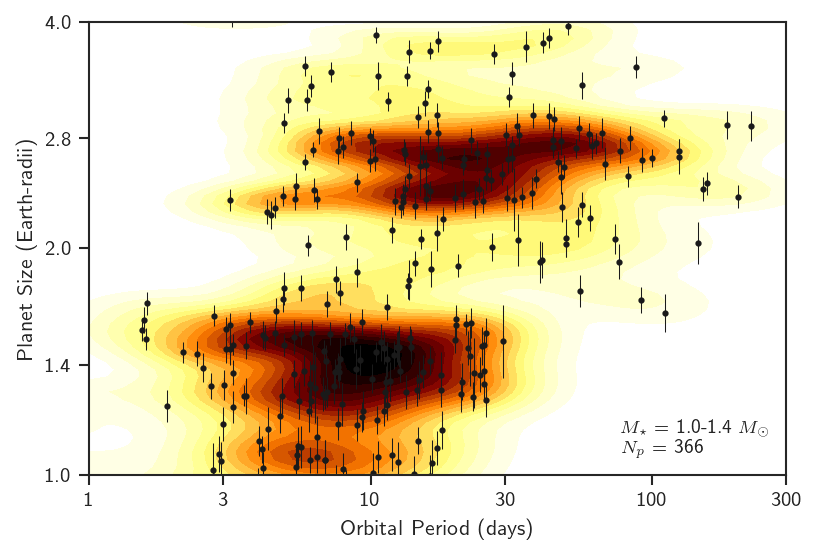

In [13]:

p1 = ContourPlotter(samp2.x,samp2.dr25_prad,samp2.dr25_prad_err)
p1.compute_density()
p1.plot_contour(contourfkw=dict(add_colorbar=False))
p1.plot_points()
s = r"""\
$M_\star$ = 1.0-1.4 $M_\odot$
$N_p$ = {}""".format(p1.n)
keprat.plot.add_anchored(s,4,prop=dict(size='small'))


(array([  0.,   3.,   2.,   5.,   8.,   7.,   4.,  11.,  21.,  11.,  24.,
         27.,  36.,  18.,  11.,   7.,  12.,  26.,  22.,  34.,  19.,   8.,
          9.,   6.,   4.,   3.,   0.,   3.,   3.,   0.,   2.,   3.,   2.,
          0.,   2.,   3.,   2.,   4.,   1.]),
 array([  0.5       ,   0.54525387,   0.59460356,   0.64841978,
          0.70710678,   0.77110541,   0.84089642,   0.91700404,
          1.        ,   1.09050773,   1.18920712,   1.29683955,
          1.41421356,   1.54221083,   1.68179283,   1.83400809,
          2.        ,   2.18101547,   2.37841423,   2.59367911,
          2.82842712,   3.08442165,   3.36358566,   3.66801617,
          4.        ,   4.36203093,   4.75682846,   5.18735822,
          5.65685425,   6.1688433 ,   6.72717132,   7.33603235,
          8.        ,   8.72406186,   9.51365692,  10.37471644,
         11.3137085 ,  12.3376866 ,  13.45434264,  14.67206469]),
 <a list of 1 Patch objects>)

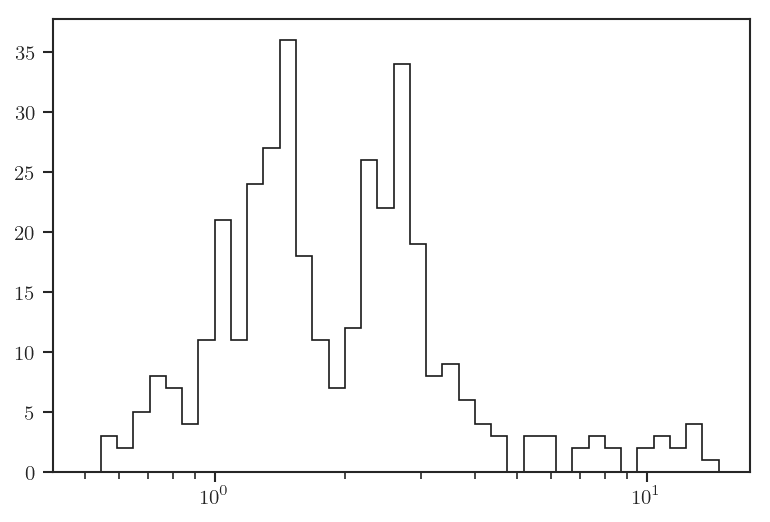

In [14]:
bins = 2**arange(-1,4,0.125)
semilogx()
hist(samp2.dr25_prad,bins=bins,histtype='step')



read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf


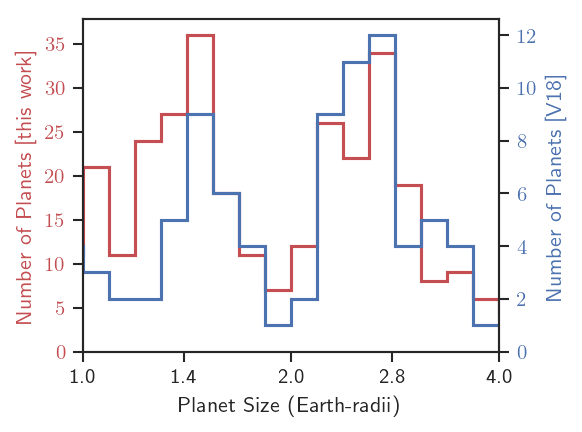

In [44]:

df = keprat.io.load_table('cksgaia-planets')
df = df.query('1.0 < f18_smass < 1.4')
df['x'] = df['f18_period']
df['dr25_prad'] = df.eval('dr25_RD1_cum * f18_srad * 109')
df['dr25_prad_err'] = df.eval('dr25_prad * sqrt( (0.5*(dr25_RD1_cum_err1 - dr25_RD1_cum_err2)/dr25_RD1_cum)**2 + (f18_srad_err/f18_srad)**2)')
df = df.dropna(subset=['x','dr25_prad','dr25_prad_err'])
samp2 = df.query('dr25_tau/f18_tau0 > 0.6')

import seaborn as sns
sns.set_style('ticks')
sns.set_color_codes()
sns.set_context('paper',font_scale=1.1)


fig = figure(figsize=(4,3))
ax1 = gca()
bins = 2**arange(-1,4,0.125)

color = 'r'
semilogx()
ax1.set_xlabel('Planet Size (Earth-radii)')
ax1.set_ylabel('Number of Planets [this work]', color=color)
ax1.hist(samp2.dr25_prad,bins=bins,histtype='step',color=color,lw=1.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'b'
df = keprat.io.load_table('v18')
sca(ax2)
hist(df.v18_prad,bins=bins,histtype='step',color=color,lw=1.5)
ax2.set_ylabel('Number of Planets [V18]', color=color)
ax2.tick_params(axis='y', labelcolor=color)
xlim(0.5,8)
minorticks_off()
xt = [0.5,0.7,1.0,1.4,2.0,2.8,4.0,5.6,8.0]
xticks(xt,xt)
xlim(1,4)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('paper/fig_compare-v18-thiswork-hist.pdf')


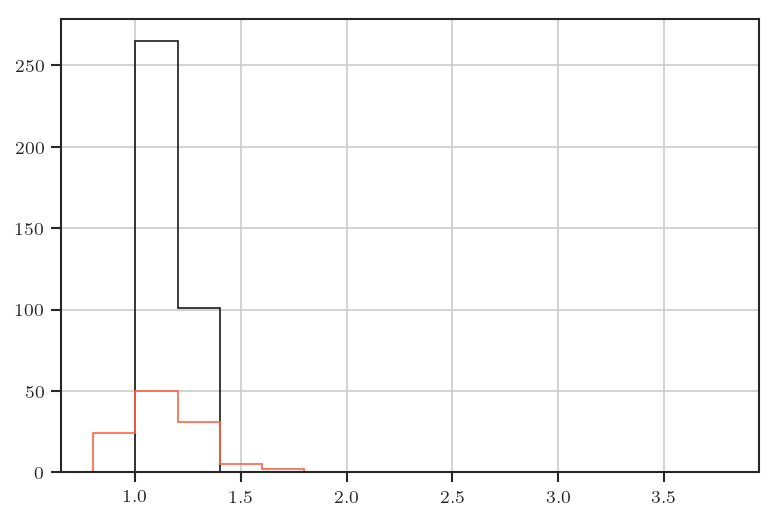

In [16]:
bins=arange(0.8,4.0,.2)
samp2.f18_smass.hist(bins=bins,histtype='step')
v18.v18_smass.hist(bins=bins,histtype='step')

In [42]:
mean(abs(np.random.randn(int(1e6)) * 0.08))

0.063857928304745057